In [1]:
import numpy as np
import random, math
from scipy.optimize import minimize
import matplotlib.pyplot as plt

## 5 Create data

In [2]:
classA = np.concatenate ((np.random.randn(10,2) * 0.2 + [1.5, 0.5 ] ,np.random.randn(10, 2) * 0.2 + [-1.5, 0.5]))
classB = np.random.randn(20, 2) * 0.2 + [0.0, -0.5]
inputs = np.concatenate((classA, classB))
targets = np.concatenate (
(np.ones(classA.shape[0]),-np.ones(classB.shape[0])))
N = inputs.shape [0] # Number of rows ( samples )
permute = list(range(N))
random.shuffle(permute)
inputs = inputs[permute,:]
targets = targets[permute]

In [4]:
def P_ij(inputs,targets,func,param):
    inputs_ij = np.array([func(i,j,param) for i in inputs for j in inputs])
    targets_ij = np.dot(targets[:,None],targets[None,:])
    targets_ij = np.asarray(targets_ij).reshape(-1)
    P = inputs_ij*targets_ij
    return P

## implement necessary functions

In [5]:
#linear kernel
def lin_kernel(x,y,any=0):
    erg = np.dot(x,y)
    return erg

#polynomial kernel
def pol_kernel(x,y,p):
    erg = (np.dot(x,y)+1)**p
    return erg

#RBF kernel
def RBF_kernel(x,y,sigma):
    exp = (np.linalg.norm(x-y,2)**2)/(2*sigma**2)
    erg = np.exp(-exp)
    return erg

In [28]:
def calc_b(alpha,targets,s_ind,inputs,func,sigma):
    erg = []
    for i in range(len(inputs)):
        temp = alpha[i]*func(inputs[i],inputs[s_ind],sigma)*targets[i]
        erg.append(temp)
    return sum(erg)-targets[s_ind]


def ind(s,inputs,alpha,targets,b,func,sigma):
    erg = []
    for i in range(len(inputs)):
        temp = func(inputs[i],s,sigma)*targets[i]*alpha[i]
        erg.append(temp)
    return sum(erg)-b


def norm(threshold, data):
    alpha = []
    for i in data:
        if i < threshold:
            alpha.append(0)
        else:
            alpha.append(i)
    return np.array(alpha)


In [5]:
def objective(alpha):
    alpha_ij = np.array([i*j for i in alpha for j in alpha])
    temp = np.array([i*j for i,j in zip(alpha_ij,PA)])
    erg = 0.5*sum(temp) - np.sum(alpha) #PT should be already an array to optimize runtime
    return erg

def z_const(alpha):
    erg = np.dot(alpha,t)
    return erg


## Linear kernel

In [12]:
#do optimization
C = 5
sigma = 1
PA = P_ij(inputs,targets,RBF_kernel,sigma)
t = targets
B = [(0, C) for b in range(N)]

ret = minimize(objective,np.zeros(40),B,constraints={'type':'eq','fun':z_const})
ret['x']

array([-168.3312538 ,  249.93238359,  -10.99150282,  -77.65090166,
         88.99287508, -393.91475639, -254.87334953, -238.239283  ,
        565.71212989,  105.09785885, -623.40263912, -197.79124242,
         64.07798319,  113.92063469,  -70.85528108,  439.46817775,
        -86.82209861,  238.29438888,  -49.74253358, -303.64446477,
       -230.15208692, -492.99453692, -177.6830555 ,  465.62030922,
         30.26263062,  136.29476115,  533.60429844,  142.24459457,
       -519.2440588 ,  152.68501187,  151.22379266,  341.22385982,
         10.84644164, -123.15882262,   72.93134711,  168.71336303,
       -124.83235338, -267.37482491,  525.43308359,   81.03107576])

In [27]:
alpha = norm(10**-5, ret['x'])
alpha

array([ 0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        9.06243722,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        , 22.90526205,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        , 13.84282483,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ])

In [14]:
b = calc_b(alpha,targets,5,inputs,lin_kernel,0)


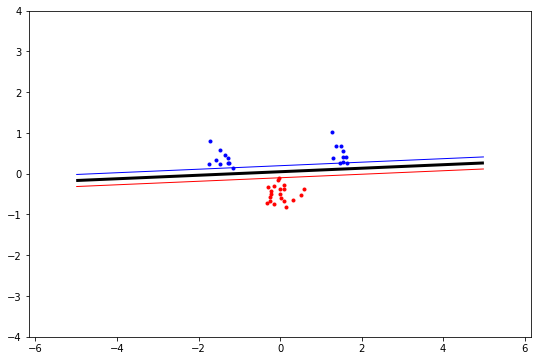

In [25]:
plt.figure(figsize=(9,6))
plt.plot([p[0] for p in classA],[p[1] for p in classA],'b.')
plt.plot([p[0] for p in classB],[p[1] for p in classB],'r.')
plt.axis('equal') # Force same s c a l e on both axes
plt.savefig('svmplot.pdf') # Save a copy 

xgrid = np.linspace(-5 , 5)
ygrid = np.linspace(-4 , 4)
grid = np.array([[ind(np.array([x,y]),inputs,alpha,targets,b,lin_kernel,0) for x in xgrid] for y in ygrid])

plt.contour( xgrid, ygrid, grid,(-1.0 , 0.0 , 1.0 ), colors =('red', 'black','blue'), linewidths =(1, 3, 1))
plt.show()

## RBF Kernel

In [35]:
#do optimization
C = None
sigma = 1
PA = P_ij(inputs,targets,RBF_kernel,2)
t = targets
B = [(0, None) for b in range(N)]

ret = minimize(objective,np.zeros(40),bounds=B,constraints={'type':'eq','fun':z_const})
ret['x']

array([0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       8.35729594e+00, 0.00000000e+00, 0.00000000e+00, 8.28853787e-15,
       0.00000000e+00, 1.92239520e+01, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       1.08666561e+01, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00])

In [36]:
alpha = norm(10**-5, ret['x'])
alpha

array([ 0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  8.35729594,  0.        ,
        0.        ,  0.        ,  0.        , 19.22395204,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        , 10.86665609,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ])

In [37]:
b = calc_b(alpha,targets,5,inputs,RBF_kernel,2)

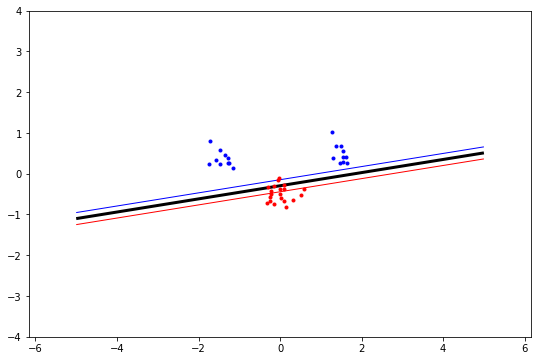

In [38]:
plt.figure(figsize=(9,6))
plt.plot([p[0] for p in classA],[p[1] for p in classA],'b.')
plt.plot([p[0] for p in classB],[p[1] for p in classB],'r.')
plt.axis('equal') # Force same s c a l e on both axes
#plt.savefig('svmplot.pdf') # Save a copy 

xgrid = np.linspace(-5 , 5)
ygrid = np.linspace(-4 , 4)
grid = np.array([[ind(np.array([x,y]),inputs,alpha,targets,b,lin_kernel,0) for x in xgrid] for y in ygrid])

plt.contour( xgrid, ygrid, grid,(-1.0 , 0.0 , 1.0 ), colors =('red', 'black','blue'), linewidths =(1, 3, 1))
plt.show()

## polynomial kernel

In [ ]:
#do optimization
C = None
sigma = 1
PA = P_ij(inputs,targets,_kernel,2)
t = targets
B = [(0, None) for b in range(N)]

ret = minimize(objective,np.zeros(40),bounds=B,constraints={'type':'eq','fun':z_const})
ret['x']